In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
def wrangle(filepath):
    # Import CSV
    df = pd.read_csv(filepath)
    
    # Remove Outliers
    low, high = df["median_house_value"].quantile([0.1, 0.9])
    mask_median_value= df["median_house_value"].between(low, high)
    
    df = df[mask_median_value]
    
    return df

In [3]:
#   Import data
df = wrangle("California_housing.csv")

In [4]:
# Check infomation about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16516 entries, 1 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16516 non-null  float64
 1   latitude            16516 non-null  float64
 2   housing_median_age  16516 non-null  int64  
 3   total_rooms         16516 non-null  int64  
 4   total_bedrooms      16347 non-null  float64
 5   population          16516 non-null  int64  
 6   households          16516 non-null  int64  
 7   median_income       16516 non-null  float64
 8   ocean_proximity     16516 non-null  object 
 9   median_house_value  16516 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [5]:
# the first five information abou the data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700


In [6]:
# Chech the number of unique values in df["ocean_proximity"] column
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

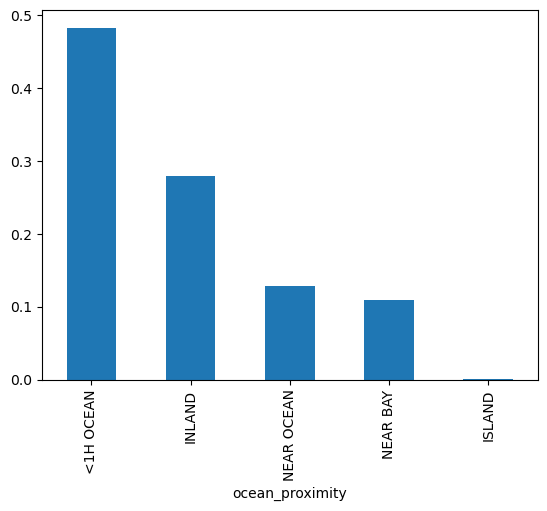

In [7]:
# Plot the number of values in each category under df["ocean_proximity"]
df["ocean_proximity"].value_counts(normalize=True).plot(kind="bar");

In [8]:
# Statistical details of "median_house_value"
df["median_house_value"].describe().apply("{0:,.0f}".format)

count     16,516
mean     192,764
std       74,496
min       82,300
25%      133,975
50%      179,700
75%      241,925
max      376,600
Name: median_house_value, dtype: object

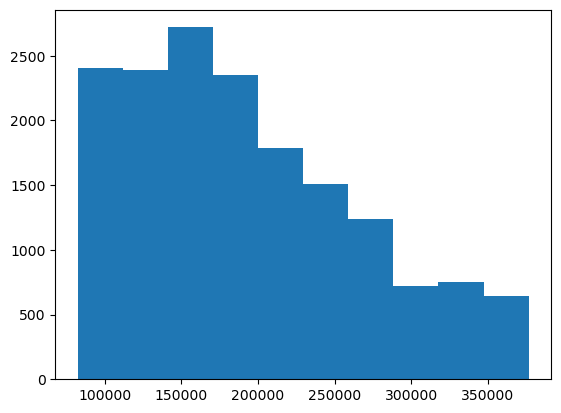

In [9]:
# Plot the distribution of "median_house_value"
plt.hist(df["median_house_value"]);

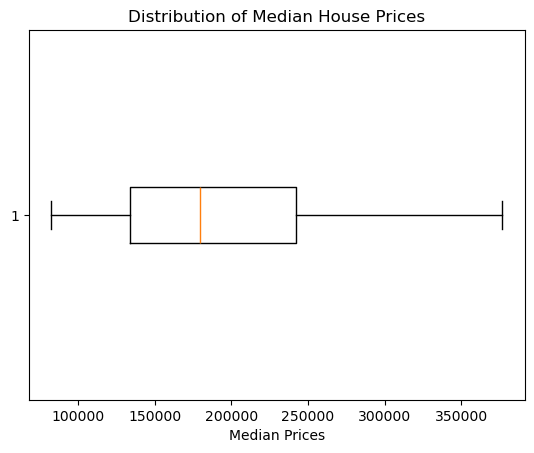

In [10]:
# Plot boxplot of median house prices in califonia
plt.boxplot(df["median_house_value"], vert=False)
plt.xlabel("Median Prices"),
plt.title("Distribution of Median House Prices");

In [11]:
# Remove Outliers
#low, high = df["median_house_value"].quantile([0.1, 0.9])
#mask= df["median_house_value"].between(low, high)
#high

In [12]:
# Group according to the promimity 
df_medain_price = df.groupby("ocean_proximity")["median_house_value"].median().sort_values(ascending=False)

In [13]:
df_medain_price

ocean_proximity
ISLAND        293750.0
NEAR BAY      208650.0
NEAR OCEAN    206800.0
<1H OCEAN     200000.0
INLAND        127900.0
Name: median_house_value, dtype: float64

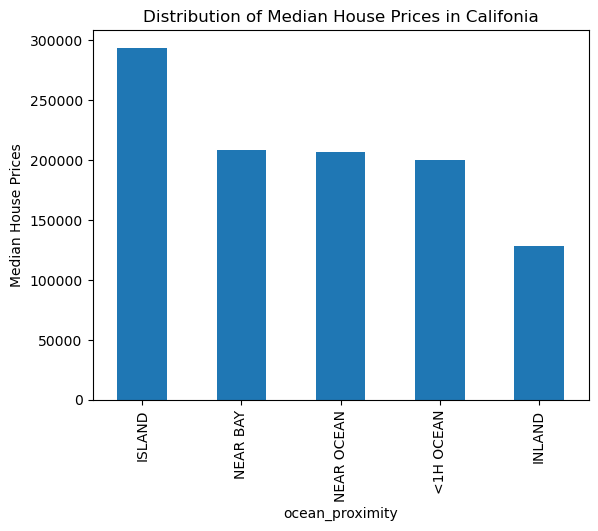

In [14]:
# Distribution of median House Prices based on proximity.
df_medain_price.plot(
    kind="bar",
    xlabel="ocean_proximity",
    ylabel= "Median House Prices",
    title= "Distribution of Median House Prices in Califonia"
);